# Introduction
Welcome to this Python demonstration on time series modelling.

Time series modelling is a set of tools and techniques that model temporal or time series data and aim to predict or forecast future behavior of the data. It has applications in various fields such as finance, economics, weather forecasting, and more.

By analysing historical data, we can identify different components in time series data such as trends, seasonality, and so on, and use these insights to make more informed business decisions.

In this demonstration, we will explore a few different techniques for time series modelling. As we construct and evaluate our models, we'll gain insight into how different techniques can be used to handle common challenges in time series modelling.

By the end of this demonstration, you will have a solid understanding of how to build and evaluate time series models in Python, and how to apply these techniques to real-world data sets.

## Problem Statement
In  this demonstration, we will apply time series modelling techniques to a real-world problem that involves a company and its sales. The company has historical sales data that it has captured over a period of time and wishes to forecast future sales trends so that it may optimise its inventory management processes.

The problem statement for this demonstration can be summarised as follows:
> Given historical sales data of a company, forecast its future sales.

By studying the forecast, the company can effectively plan and prepare their inventory to ensure that the right amount of stock is made ready over future months.

## Data Description
You have been provided with a data set containing daily sales and profit data of the company for the period 2021 to 2024. The data set has the following three attributes:

<table>
  <tr>
    <th> Attributes </th>
    <th> Description <th>
  </tr>
  <tr>
    <td> Order-Date </td>
    <td> The date on which the order was placed (in dd-mm-yyyy format) </td>
  </tr>
  <tr>
    <td> Sales </td>
    <td> Total sales value of the transaction (in dollars) </td>
  </tr>
  <tr>
    <td> Profit </td>
    <td> Profit made on the transaction (in dollars) </td>
  </tr>

</table>

## Outline
In this demonstration, we will:
- Prepare the data for time series modelling
- Forecast sales using the following models:
  - Linear regression
  - Naive
  - Simple average
  - Simple moving average
  - Simple exponential smoothing
  - Holt's
  - Holt-Winters' additive
  - Holt-Winters' multiplicative

We will analyse the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

Please note that while we could evaluate the performance of the forecasting models using any one of RMSE or MAPE, to obtain a more comprehensive assessment of their performance, we will use both measures for each model.

# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

We will begin by importing all the packages that we will be using in this part of the demonstration, which are:
- *NumPy* and *Pandas* for working with numbers and dataframes
- *pyplot* from *matplotlib* and *seaborn* for visualisations
- *ConvergenceWarning* from *statsmodels* and *warnings* to suppress warnings

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
!pip install statsmodels
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualisations
from matplotlib import pyplot as plt
import seaborn as sns

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Let's begin by loading the data and building familiarity with it.

In [2]:
# Load the data and take a look at it
df = pd.read_csv('Superstore_Data.csv')
df.head()



,Order Date,Sales,Profit
0,17-10-2023,5175.171,919.971
1,07-11-2021,1822.080,564.840
2,14-04-2022,5244.840,996.480
3,06-06-2023,3701.520,1036.080
4,25-02-2022,1878.720,582.360


In [3]:
# View specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  5699 non-null   object 
 1   Sales       5699 non-null   float64
 2   Profit      5699 non-null   float64
dtypes: float64(2), object(1)
memory usage: 133.7+ KB


As you can see, the data type of the *Order Date* column is *object*. But to further conduct analyses on the data, such as grouping by month or year, we have to convert the data type of the *Order Date* column to *datetime*.

In [4]:
# Convert the 'Order Date' feature to the 'datetime' data type
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
# View specifics of the data frame
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  5699 non-null   datetime64[ns]
 1   Sales       5699 non-null   float64       
 2   Profit      5699 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 133.7 KB
Index(['Order Date', 'Sales', 'Profit'], dtype='object')


Let's make sure that the data points in the data frame are ordered by date.

In [6]:
# Ensure that the data are ordered chronologically
df.sort_values(by = 'Order Date', ascending = True, inplace = True)
df

,Order Date,Sales,Profit
5073,2021-01-01,55.2420,15.3420
3056,2021-01-01,120.3660,36.0360
4083,2021-01-01,113.6700,37.7700
424,2021-01-03,912.4560,-319.4640
5517,2021-01-03,6.0060,0.5460
...,...,...,...
4875,2024-12-30,8.5407,2.3607
1455,2024-12-30,255.2850,-47.6550
4345,2024-12-30,10.8540,-6.6960
1804,2024-12-31,300.2400,84.0600


Next, we will set the updated *Order Date* feature as the index of the data frame.

In [7]:
# Set the index of the data frame to 'Order Date'
df.set_index(keys = 'Order Date', drop = True, inplace = True)
df

,Sales,Profit
Order Date,,
2021-01-01,55.2420,15.3420
2021-01-01,120.3660,36.0360
2021-01-01,113.6700,37.7700
2021-01-03,912.4560,-319.4640
2021-01-03,6.0060,0.5460
...,...,...
2024-12-30,8.5407,2.3607
2024-12-30,255.2850,-47.6550
2024-12-30,10.8540,-6.6960


To study monthly sales, we need to group the rows of *df* by month and sum up the values in each group. We will use the *Grouper* function in conjunction with the *groupby* operation for grouping. *Grouper* is a function in the *pandas* library that allow us to group time series data based on a specific frequency (*freq*) which in our case is monthly (*M*).

In [8]:
df.index.name

'Order Date'

In [9]:
# Obtain the monthly total sales for each month
df = df.groupby(by = pd.Grouper(freq = 'M')).sum()

In [10]:
# Take a look at the data
df.head()

,Sales,Profit
Order Date,,
2021-01-31,15711.7125,991.2825
2021-02-28,12910.8588,1338.8688
2021-03-31,19472.5632,3747.1632
2021-04-30,15440.3046,3846.4746
2021-05-31,24348.9723,3639.9423


You can see that only one date from each month is used in the index as representative of each of those months.

Recall from the problem statement that we are interested in forecasting *Sales*. So, we can drop the *Profit* feature from our data set.

In [11]:
# Drop the 'Profit' column as we are not using it in this analysis
df.drop(labels = 'Profit', axis = 1, inplace = True)

In [12]:
# Take a look at the shape of the data
df.shape

(48, 1)

In [13]:
# Take a look at the data
df.head()

,Sales
Order Date,
2021-01-31,15711.7125
2021-02-28,12910.8588
2021-03-31,19472.5632
2021-04-30,15440.3046
2021-05-31,24348.9723


Let's now plot our data set to visualise our time series and try to identify patterns in it.

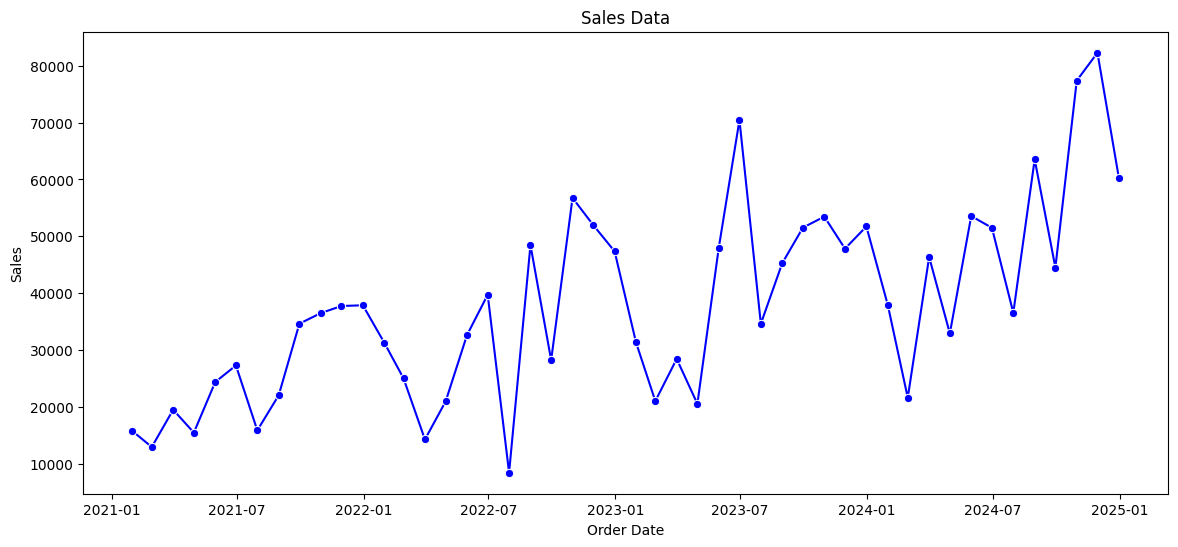

In [14]:
# Plot the time series data
plt.figure(figsize = (14, 6))
sns.lineplot(data = df, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.title('Sales Data');

# Part 2 - Decomposition of Time Series
In this section, we will decompose the time series data using additive and multiplicative seasonal decomposition methods and analyse the resultant components of the time series.

To implement decomposition methods we will use the *seasonal_decompose* method from the *statsmodels* library. This function decomposes a time series into its components, which include trend, seasonality, and residual (or error) terms. A couple of parameters that should be emphasised here are:
- *x*: The input time series that we want to decompose
- *model*: The type of decomposition model to use (*'additive'* or *'multiplicative'*)

Let's import the *seasonal_decompose* method from *statsmodels*.

In [15]:
# Import 'seasonal_decompose' from 'statsmodels' for seasonal decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose

We are now ready to decompose our time series data into is components.

### Subpart 1 - Additive Seasonal Decomposition

For additive decomposition we will set the *model* parameter to *'additive'*. Note that this is also its default value.

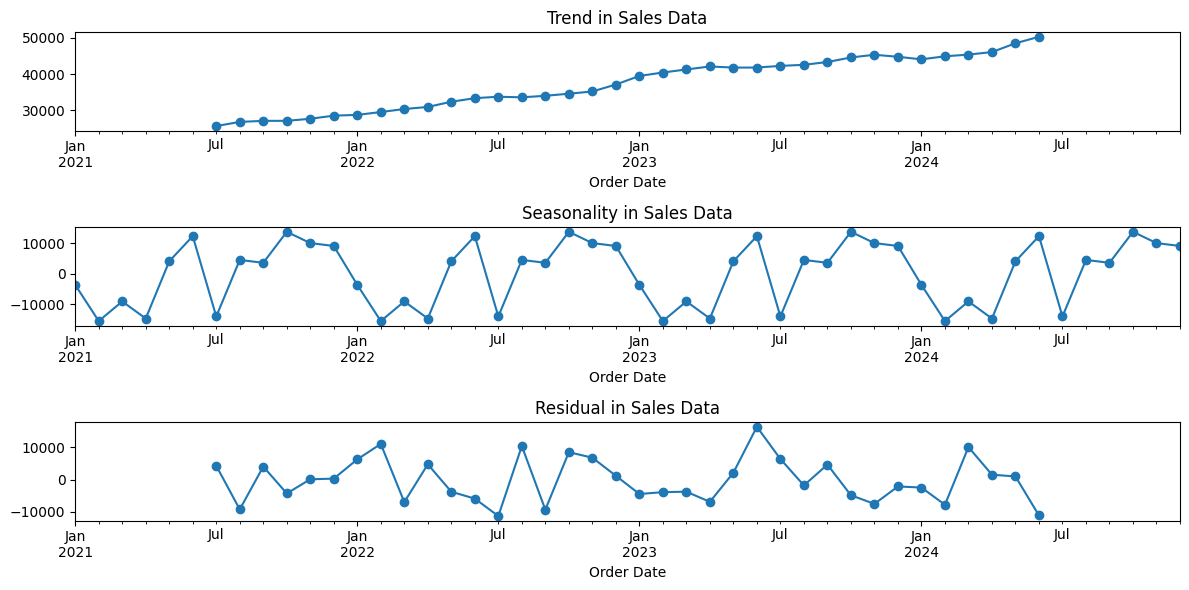

In [17]:
# Perform additive decomposition on the data and plot the resultant components
result_additive = seasonal_decompose(x = df['Sales'], model = 'additive')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12, 6))
result_additive.trend.plot(ax = ax1, marker = 'o')
ax1.set_title('Trend in Sales Data')
result_additive.seasonal.plot(ax = ax2, marker = 'o')
ax2.set_title('Seasonality in Sales Data')
result_additive.resid.plot(ax = ax3, marker = 'o')
ax3.set_title('Residual in Sales Data')
plt.tight_layout();

### Subpart 2 - Multiplicative Seasonal Decomposition

Let's now implement multiplicative seasonal decomposition. For this, we will set the *model* parameter to *'multiplicative'*.

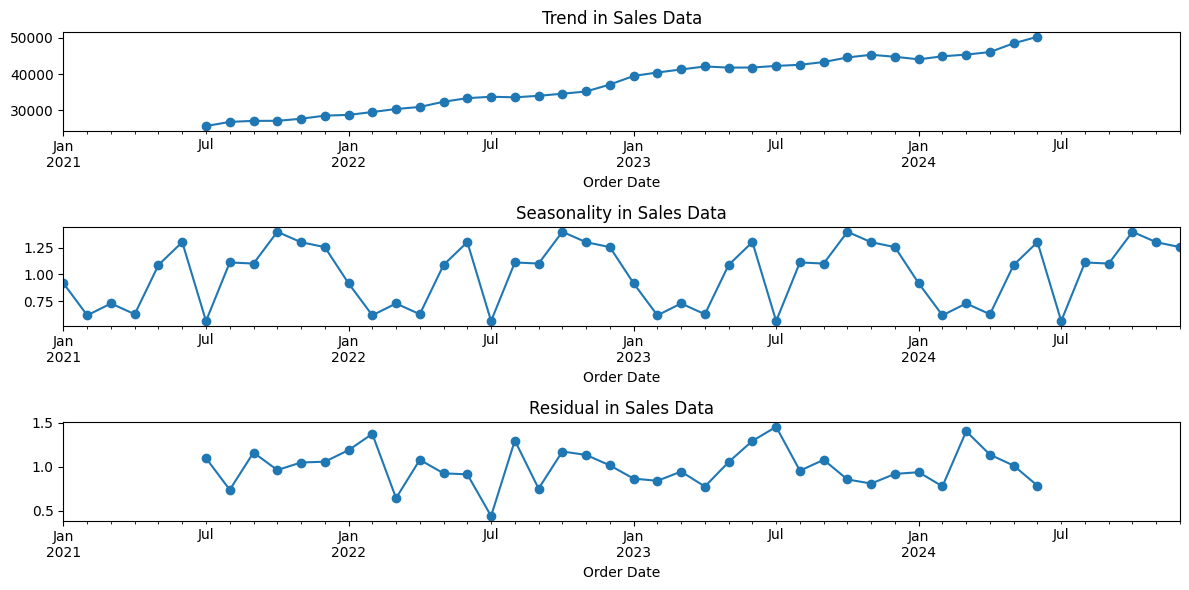

In [18]:
# Perform multiplicative decomposition on the data and plot the resultant components
result_multiplicative = seasonal_decompose(df['Sales'], model = 'multiplicative')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12, 6))
result_multiplicative.trend.plot(ax = ax1, marker = 'o')
ax1.set_title('Trend in Sales Data')
result_multiplicative.seasonal.plot(ax = ax2, marker = 'o')
ax2.set_title('Seasonality in Sales Data')
result_multiplicative.resid.plot(ax = ax3, marker = 'o')
ax3.set_title('Residual in Sales Data')
plt.tight_layout();

Note that the *seasonal_decompose* method does not make any predictions. The method is generally used to study and analyse time series data before going into prediction models.

# Part 3 - Simple Time Series Models
In this part of the demonstration we will fit basic models to the data and analyse their performance using RMSE and MAPE values. We will build following models:
- Linear regression
- Naive
- Simple average
- Simple moving average

We have analysed our time series data and studied its components. Let's now split the data into training and testing sets so that we're ready to build and evaluate time series models on the data.

In [21]:
# Split the data into training and testing data sets
train_len = 42
df_train = df[:train_len] # first 42 months as training set
df_test = df[train_len:] # last 6 months as out-of-time test set


### Subpart 1 - Linear Regression Method
We will begin by fitting a linear regression model to the training data and analyse its performance.

We will use the *LinearRegression* method from *sklearn* to fit a regression line to the training data.

In [18]:
# Import 'LinearRegression' from 'sklearn' for building regression models
from sklearn.linear_model import LinearRegression

Note that our time series data is a single variable. So, we need to create an independent variable associated with the time series to build a regression model.

In [19]:
# Create the independent variable for the linear regression model
linreg_X = np.arange(0, train_len, 1)

In [20]:
# Convert the training variables into 2D arrays
linreg_X = linreg_X.reshape(-1, 1)
linreg_y = np.array(df_train['Sales']).reshape(-1, 1)

In [21]:
# Create and fit a linear regression model to the training data
linreg_model = LinearRegression()
linreg_model.fit(X = linreg_X, y = linreg_y);

In [22]:
# Create the independent variable for the complete data set
linreg_X_all = np.arange(0, len(df), 1)
linreg_X_all = linreg_X_all.reshape(-1, 1)

In [23]:
# Generate the complete regression line including both the training and testing data
y_pred_lr = linreg_model.predict(linreg_X_all)

In [24]:
# Convert the predictions into a 1D array
y_pred_lr = y_pred_lr.reshape(len(y_pred_lr))

Let's visualise the predictions along with the data before computing error measures.

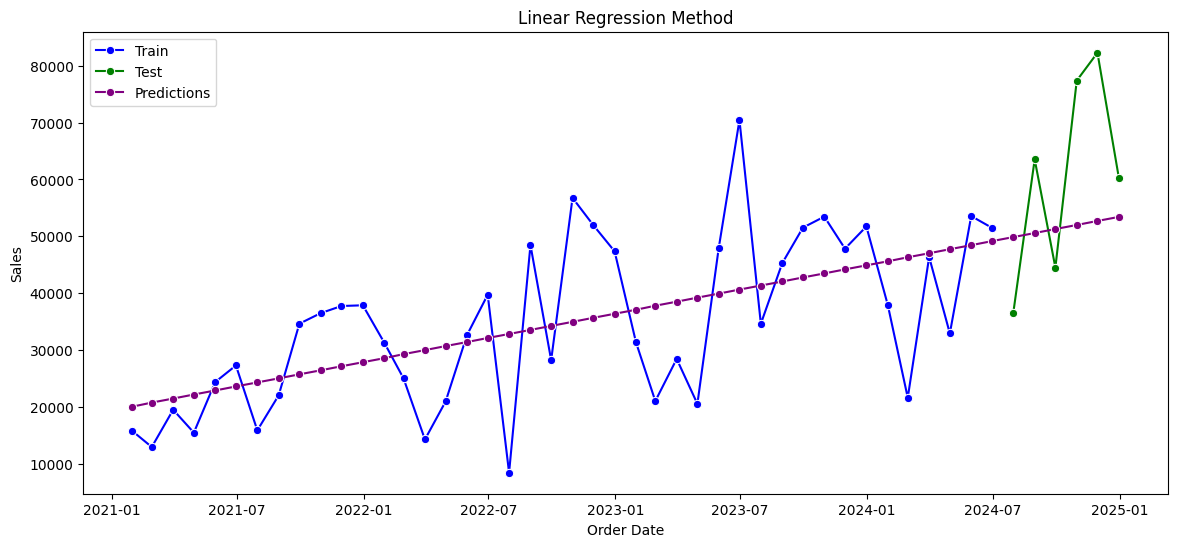

In [25]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df, x = 'Order Date', y = y_pred_lr, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Linear Regression Method');

Next, let's compute performance metrics for the model. But to do that, we will first import the *mean_squared_error* function from *sklearn*.

In [26]:
# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

We will now compute RMSE and MAPE values for the model.

In [27]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = y_pred_lr[train_len:]
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_lr_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_lr_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df = pd.DataFrame(index = [0],
                              data = {'Model': 'Linear Regression', 'RMSE': rmse, 'MAPE': mape})

performance_df.set_index(keys = 'Model', inplace = True)

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.4


### Subpart 2 -  Naive Method

Now we will build one of the simplest time series models, the naive model, which uses the ultimate value in the training data set as the prediction for all future timesteps.

In [28]:
# Generate predictions for the test data
y_pred_n = df_train['Sales'][train_len - 1]

Let's visualise the predictions along with the data before computing error measures.

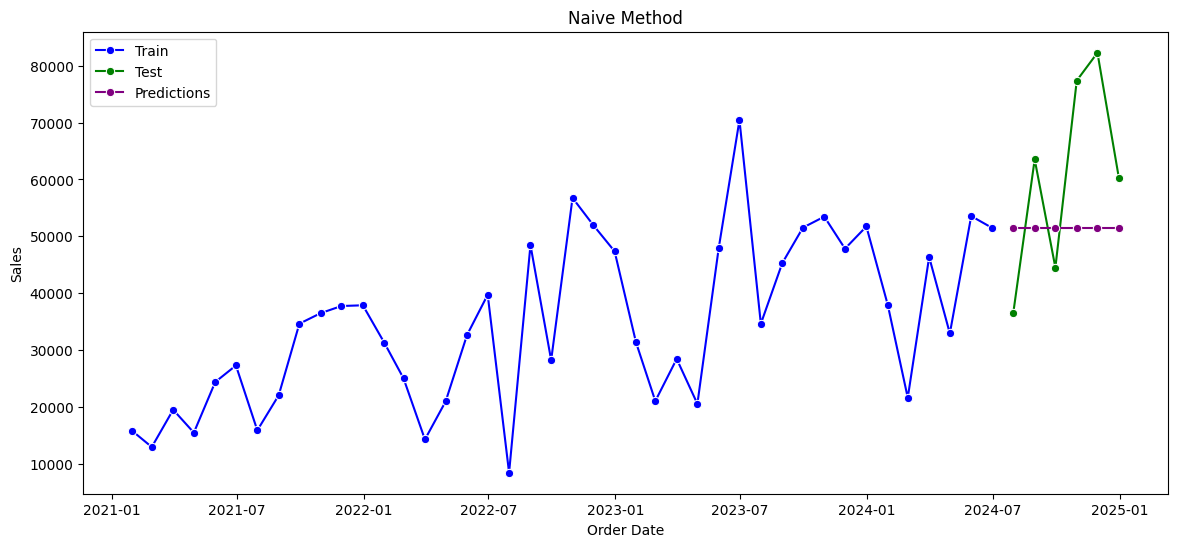

In [29]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Order Date', y = y_pred_n, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Naive Method');

We will now compute RMSE and MAPE values for the model.

In [30]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_n_list = [y_pred_n] * len(df_test)
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_n_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_n_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Naive', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86


### Subpart 3 -  Simple Average Method

We will now build another simple model, the simple average model, which uses the mean of all the values in the training data set as the prediction for all future timesteps.

In [31]:
# Generate predictions for the test data
y_pred_sa = df_train['Sales'].mean()

Let's visualise the predictions along with the data before computing error measures.

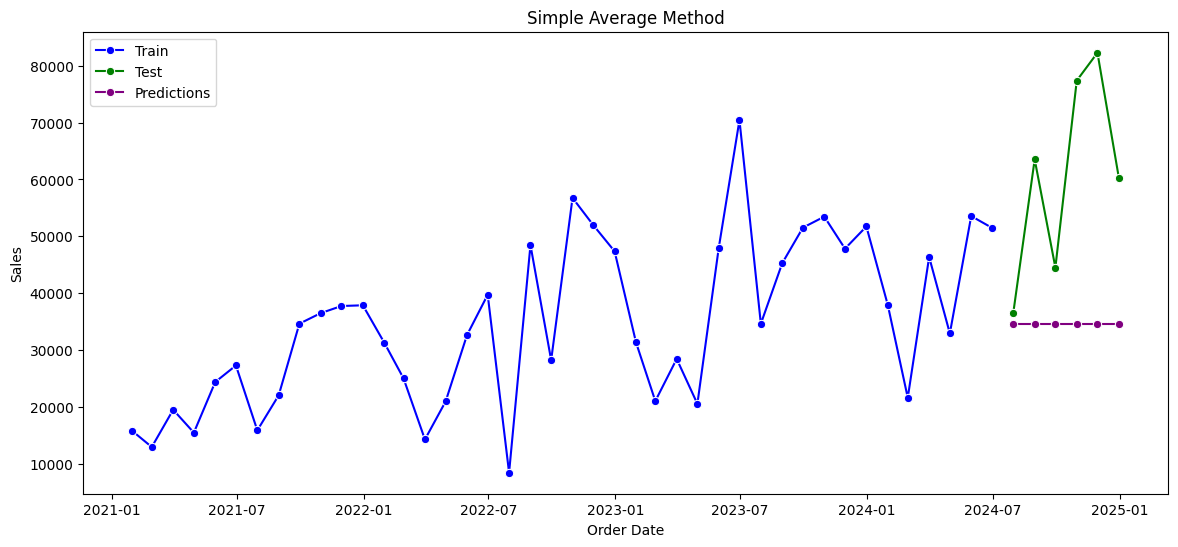

In [32]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Order Date', y = y_pred_sa, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Simple Average Method');

We will now compute RMSE and MAPE values for the model.

In [33]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_sa_list = [y_pred_sa] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_sa_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_sa_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple Average', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86
Simple Average,30846.00,38.18


### Subpart 4 -  Simple Moving Average Method

Now we will fit a simple moving average model to the training data. Unlike the simple average model, this model predicts future values using the mean value of a contiguous set of training data points that fall within an adjustable window.

**Note:** The window size can be adjusted to optimise the model's performance.

We will use the *rolling* function to emulate a moving window on the data set and obtain mean values for each window.

Here we have used a window size of 3. You can also use other window sizes and check the impact it has on the predicted values.

In [34]:
# Generate predictions for the test data
ma_window = 3
y_pred_sma = df['Sales'].rolling(window = ma_window).mean()
y_pred_sma = y_pred_sma.shift(periods = 1)
y_pred_sma[train_len:] = y_pred_sma[train_len - 1]

Let's visualise the predictions along with the data before computing error measures.

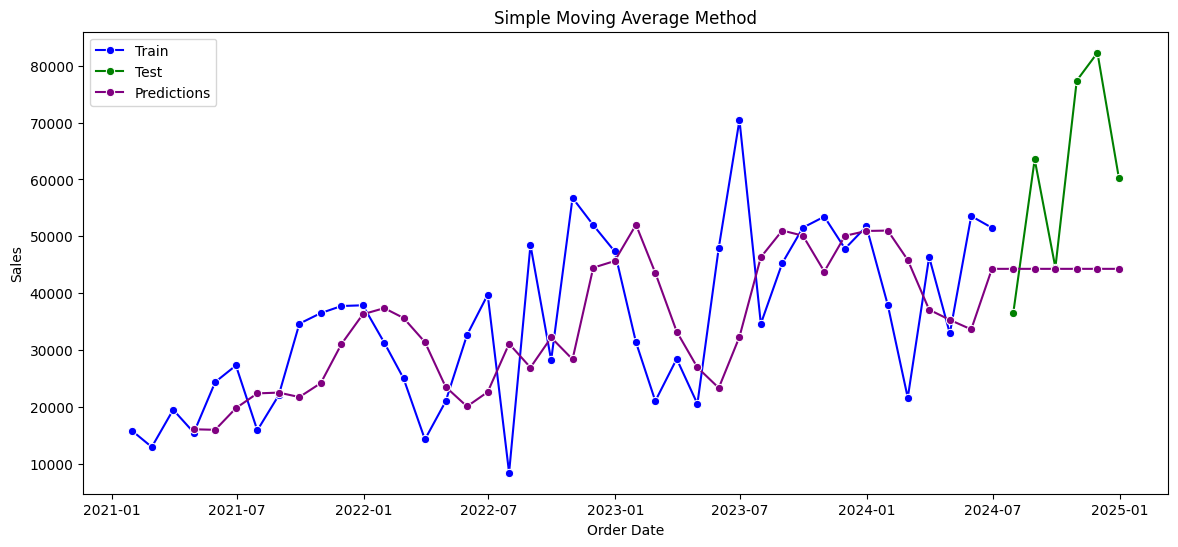

In [35]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df, x = 'Order Date', y = y_pred_sma, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method');

We will now compute RMSE and MAPE values for the model.

In [36]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_sma_list = [y_pred_sma[train_len]] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_sma_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_sma_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple Moving Average', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86
Simple Average,30846.00,38.18
Simple Moving Average,23204.52,27.93


# Part 4 - Exponential Time Series Models
In this part of the demonstration, we will fit exponential smoothing models to our data. The models that we will build are:
- Simple exponential smoothing: Captures level in the data
- Holt's exponential smoothing: Captures level and trend in the data
- Holt Winters' exponential smoothing: Captures level, trend, and seasonality in the data

**Note:** These models work on the assumption that more recent values in a time series have more influence on future values in the series than older values in the data.

### Subpart 1 -  Simple Exponential Smoothing

Now, we will get into our first exponential smoothing method, the simple exponential smoothing model.

**Note:** This model aims to capture the level in the time series data.

To apply this method we will first import the *SimpleExpSmoothing* function from *statsmodels*. This function creates an exponentially-weighted moving average model for a time series data set, where more recent observations are given more weight than older ones. It takes as input the endogenous variable of the training data set and returns a model object that can be used to make predictions on new data.

In [37]:
# Import 'SimpleExpSmoothing' from 'statsmodels' for simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

First, we create an instance of the model for our data. Note that the *endog* parameter is the time series variable under consideration.

In [38]:
# Create a model instance for the training data
model = SimpleExpSmoothing(endog = df_train['Sales'])

Now we will use the *fit* function to fit the model object on the training data set. A couple of parameters that should be emphasised here are:
- *smoothing_level*: This is the same as $\alpha$. It specifies the coefficient for level smoothing.
- *optimized*: This parameter determines whether or not to use an optimisation algorithm to estimate parameters such as *smoothing_level* (if set to *True*) or to consider user-specified values (if set to *False*).

**Note:** The default value of *optimized* is *True*.

To start with, we will consider an $\alpha$ value of 0.3.

In [39]:
# Fit the model object on the training data and obtain predictions
model = model.fit(smoothing_level = 0.3, optimized = False)
y_pred_ses = model.forecast(len(df_test))

Let's visualise the predictions along with the data before computing error measures.

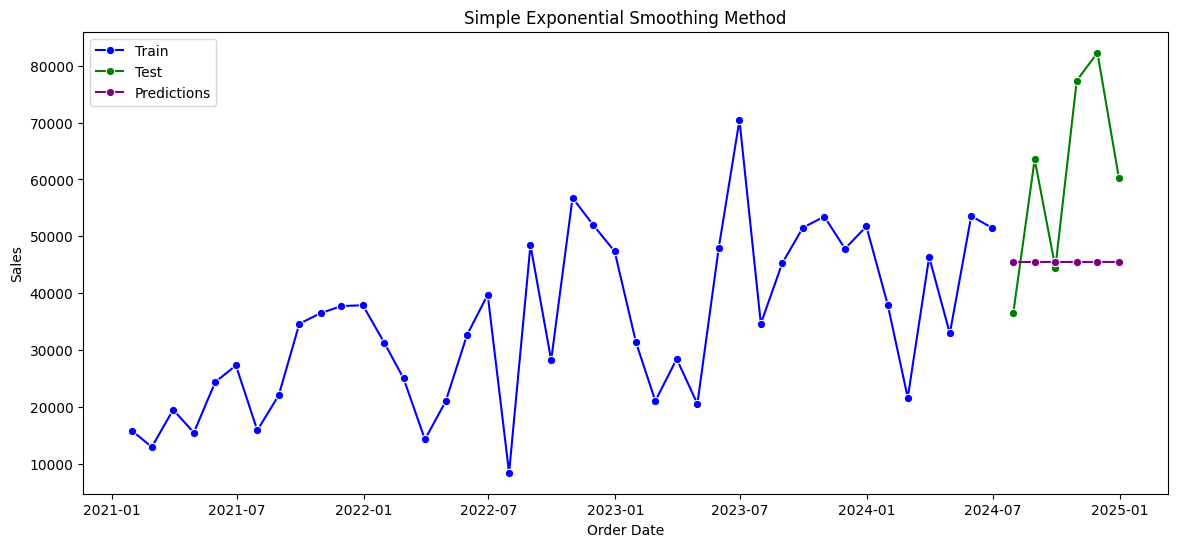

In [40]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Order Date', y = y_pred_ses, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing Method');

We will now compute RMSE and MAPE values for the model.

In [41]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_ses_list = [y_pred_ses[0]] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_ses_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_ses_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple Exponential Smoothing', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86
Simple Average,30846.00,38.18
Simple Moving Average,23204.52,27.93
Simple Exponential Smoothing,22319.00,27.61


The above result is for an $\alpha$ value of 0.3. We can, in fact, set the *optimized* parameter to *False* and tune for $\alpha$. Let's define a couple of helper functions to do this.

In [42]:
# Define a helper function that builds and evaluates a simple exponential smoothing model for the data
# Note: The 'smoothing_level' parameter will be user-controlled
def eval_sesm(train_data = None, test_data = None, alpha_val = 0):

    sesm_model = SimpleExpSmoothing(endog = train_data['Sales'])
    sesm_model = sesm_model.fit(smoothing_level = alpha_val, optimized = False)
    y_pred_sesm = sesm_model.forecast(len(test_data))

    y_pred_sesm_list = [y_pred_sesm[0]] * len(test_data)
    sesm_rmse = np.sqrt(mean_squared_error(y_true = test_data['Sales'], y_pred = y_pred_sesm_list))
    sesm_mape = np.mean(np.abs(test_data['Sales'] - y_pred_sesm_list) / test_data['Sales']) * 100

    sesm_rmse = np.round(sesm_rmse, 2)
    sesm_mape = np.round(sesm_mape, 2)

    return(sesm_rmse, sesm_mape)

In [43]:
# Define a helper function that evaluates the performance of a range of models and displays the results visually
# Note: The range of alpha values will be user-controlled
def show_sesm_performance(train_data = None, test_data = None, alpha_list = [0]):
    rmse_list = []
    mape_list = []

    for alpha in alpha_list:
        rmse_list.append(eval_sesm(train_data = train_data, test_data = test_data, alpha_val = alpha)[0])
        mape_list.append(eval_sesm(train_data = train_data, test_data = test_data, alpha_val = alpha)[1])

    performance_df = pd.DataFrame(index = alpha_list, data = {'RMSE': rmse_list, 'MAPE': mape_list})

    plt.figure(figsize = (14, 4))
    plt.subplot(1, 2, 1)
    sns.lineplot(data = performance_df, x = performance_df.index, y = rmse_list)
    plt.xlabel('alpha')
    plt.ylabel('RMSE')
    plt.title('RMSE as a function of smoothing level')
    plt.subplot(1, 2, 2)
    sns.lineplot(data = performance_df, x = performance_df.index, y = mape_list)
    plt.xlabel('alpha')
    plt.ylabel('MAPE')
    plt.title('MAPE as a function of smoothing level')

    return(None)

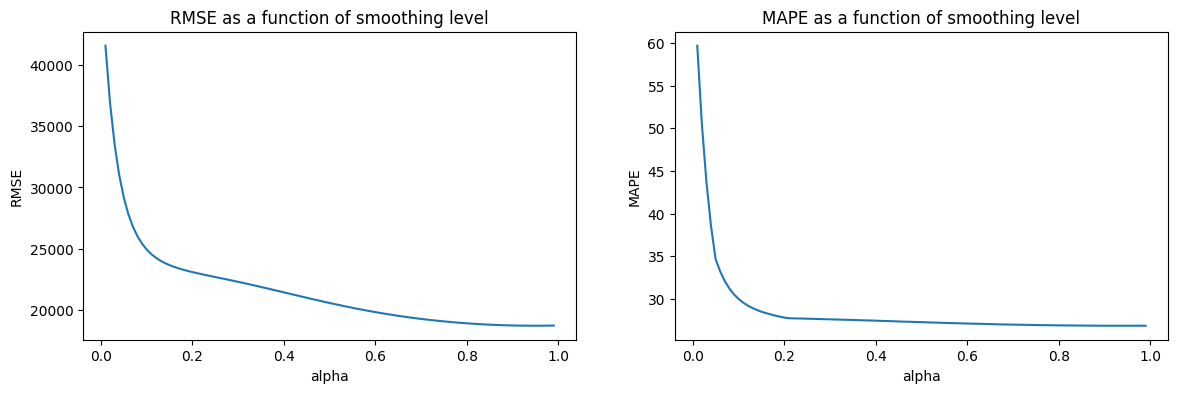

In [44]:
# Tune the model for various alpha values and visualise the performance results
show_sesm_performance(train_data = df_train, test_data = df_test, alpha_list = np.arange(0.01, 1, 0.01))

Note that most time series methods offer inbuilt optimisers. For instance, setting the *optimized* parameter of the *fit* command for the *SimpleExpSmoothing* method to *True* computes the optimal values of parameters such as *smoothing_level* internally. We can see, in this case, that the value we started off with, that is 0.3, is reasonable.

### Subpart 2 - Holt's Method

Now we will use Holt's method to fit a model on our time series data.

**Note:** This model aims to capture the level and trend in the time series data.

To apply this method we will first import the *ExponentialSmoothing* function from *statsmodels*. This function creates a time series model with an exponential smoothing method, which can include a trend and/or seasonal component, depending on the parameters specified.

In [45]:
# Import 'ExponentialSmoothing' from 'statsmodels' for exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

A few input parameters that should be emphasised here are:
- *endog*: The endogenous variable of the training data set
- *seasonal_periods*: The number of seasonal periods in the seasonality of the time series
- *trend*: The type of trend to be modeled (additive or multiplicative)
- *seasonal*: The type of seasonality to be modeled (additive or multiplicative)

**Note:** We will use the *ExponentialSmoothing* method to implement both Holt's and Holt-Winters' methods, but for Holt's exponential smoothing technique, we will not use the *seasonal* parameter.

We will first build a Holt's model that does not account for seasonality, so we will leave the *seasonal* parameter as *None*, which is the default value for that parameter. We will however set *trend* to *'additive'* instead of leaving it at the default value of *None* because we wish to capture the trend in the data.

We will also set the *seasonal_periods* parameter to 12 as the data we're working with has some monthly and annual patterns. You can however choose any value of *seasonal_periods* such as 3, 6, 24, ... and see the impact on the predicted values.

In [46]:
# Create a model instance for the training data
model = ExponentialSmoothing(endog = df_train['Sales'], seasonal_periods = 12, trend = 'additive', seasonal = None)

Now we will use the *fit* function to fit the model object created previously on the training data set. A few parameters that should be emphasised here are:
- *smoothing_level*: This is the same $\alpha$ as in *SimpleExpSmoothing*. It specifies the coefficient for level smoothing.
- *smoothing_slope*: This is the same as $\beta$. It specifies the coefficient for trend smoothing.
- *optimized*: This is the same as in *SimpleExpSmoothing*. If this is set to *True* (default), then optimal values for parameters such as $\alpha$ and $\beta$ will be computed internally.

**Note:** Another parameter of the *fit* method here is the *smoothing_seasonal* or the $\gamma$ parameter. Though this parameter exists in the *fit* method and we're setting *optimized* to *True*, it won't be used because we've specified the *seasonal* parameter in the *ExpomnentialSmoothing* method as *None*.

We have set the *optimized* parameter to *True*, but you can set it to *False* and experiment with various parameters such as *smoothing_level*, *smoothing_slope*, and *smoothing_seasonal*.

In [47]:
# Fit the model object on the training data and forecast the values of testing period
model = model.fit(optimized = True)
y_pred_hes = model.forecast(len(df_test))

Let's visualise the predictions along with the data before computing error measures.

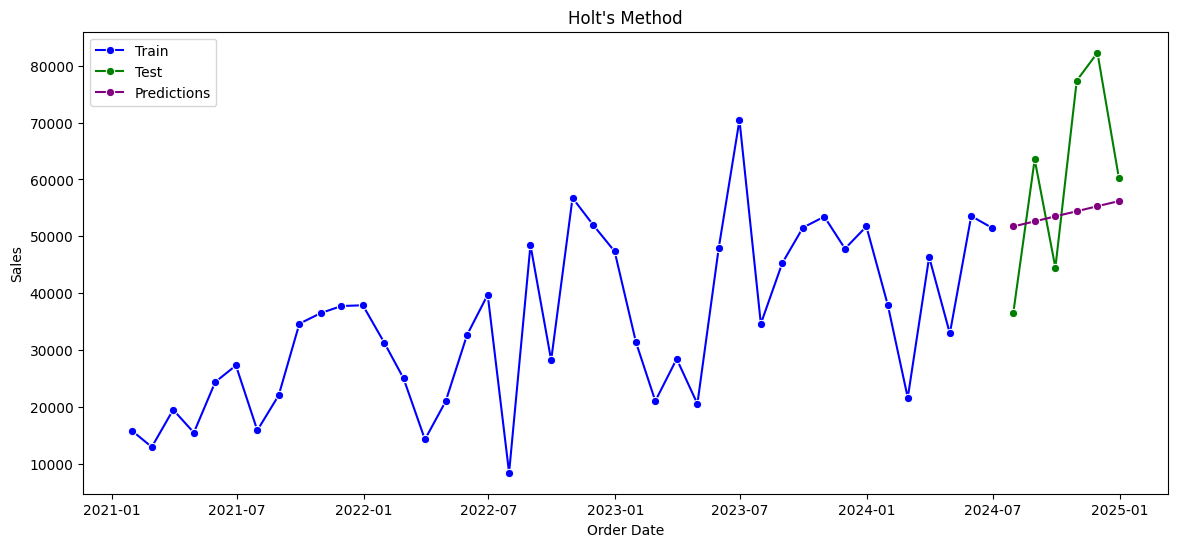

In [48]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Order Date', y = y_pred_hes, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Holt\'s Method');

We will now compute RMSE and MAPE values for the model.

In [49]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_hes_list = y_pred_hes

rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_hes_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_hes_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Holt\'s', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86
Simple Average,30846.00,38.18
Simple Moving Average,23204.52,27.93
Simple Exponential Smoothing,22319.00,27.61
Holt's,16861.22,24.74


### Subpart 3 - Holt-Winters' Additive Method

We will now use Holt-Winters' method to fit a model to our data.

**Note:** This model aims to capture level, trend and seasonality in the data.

We can build Holt-Winters' models using two types of decomposition techniques:
- Additive seasonal decomposition
- Multiplicative seasonal decomposition

Recall that we have seen the decomposition results for our time series data before.

Now, we will use additive decomposition to fit a Holt-Winters' model to our data using the *ExponentialSmoothing* function. Here we have set the *seasonal* parameter to *'additive'* in addition to the values that we previously considered for the other parameters. We have also set the *optimized* parameter to *True* here.

**Note:** Since we're specifying the *seasonal* parameter of the *ExponentialSmoothing* method as something other than *None* here, the *smoothing_seasonal* or the $\gamma$ parameter will be used in the model fit. The $\gamma$ parameter specifies the coefficient for seasonality smoothing.

In [50]:
# Create an instance of an exponential smoothing model and fit it on the training data
model = ExponentialSmoothing(endog = df_train['Sales'], seasonal_periods = 12, trend = 'additive', seasonal = 'additive')
model = model.fit(optimized = True)
y_pred_hwa = model.forecast(len(df_test))

Let's visualise the predictions along with the data before computing error measures.

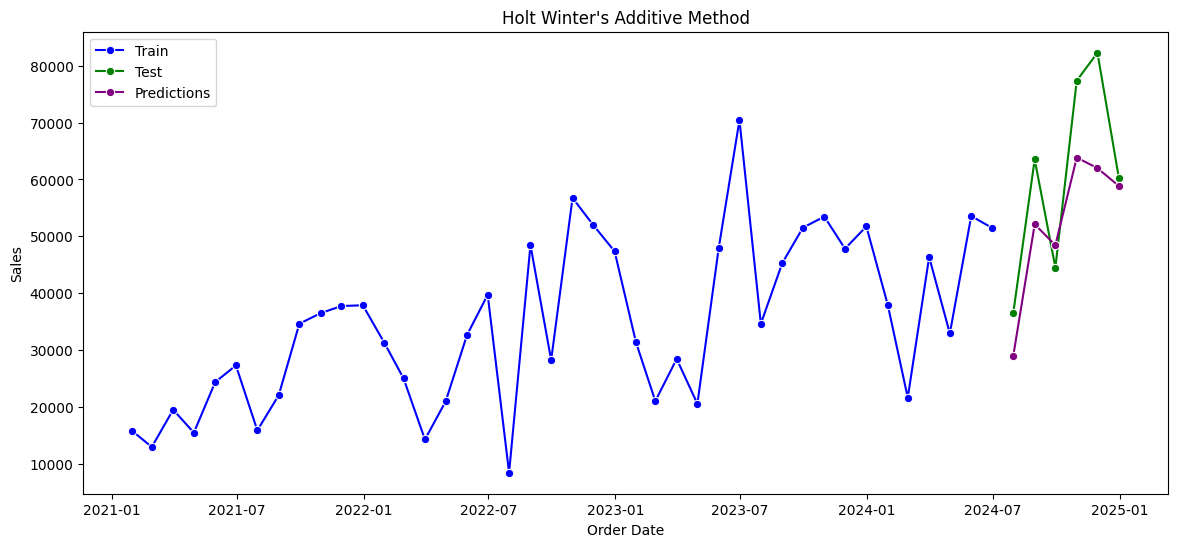

In [51]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Order Date', y = y_pred_hwa, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Holt Winter\'s Additive Method');

We will now compute RMSE and MAPE values for the model.

In [52]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_hwa_list = y_pred_hwa

rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_hwa_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_hwa_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Holt Winter\'s Additive', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86
Simple Average,30846.00,38.18
Simple Moving Average,23204.52,27.93
Simple Exponential Smoothing,22319.00,27.61
Holt's,16861.22,24.74
Holt Winter's Additive,11552.81,15.35


### Subpart 4 - Holt-Winters' Multiplicative Method

Now, we will use multiplicative decomposition to fit a Holt-Winters' model to our data using the *ExponentialSmoothing* function.

Note that we have set the *seasonal* parameter to *'multiplicative'* instead of *'additive'* here. All other parameter values remain the same as in the additive case.

In [53]:
# Create an instance of an exponential smoothing model and fit it on the training data
model = ExponentialSmoothing(endog = df_train['Sales'], seasonal_periods = 12, trend = 'additive', seasonal = 'multiplicative')
model = model.fit(optimized = True)
y_pred_hwm = model.forecast(len(df_test))

Let's visualise the predictions along with the data before computing error measures.

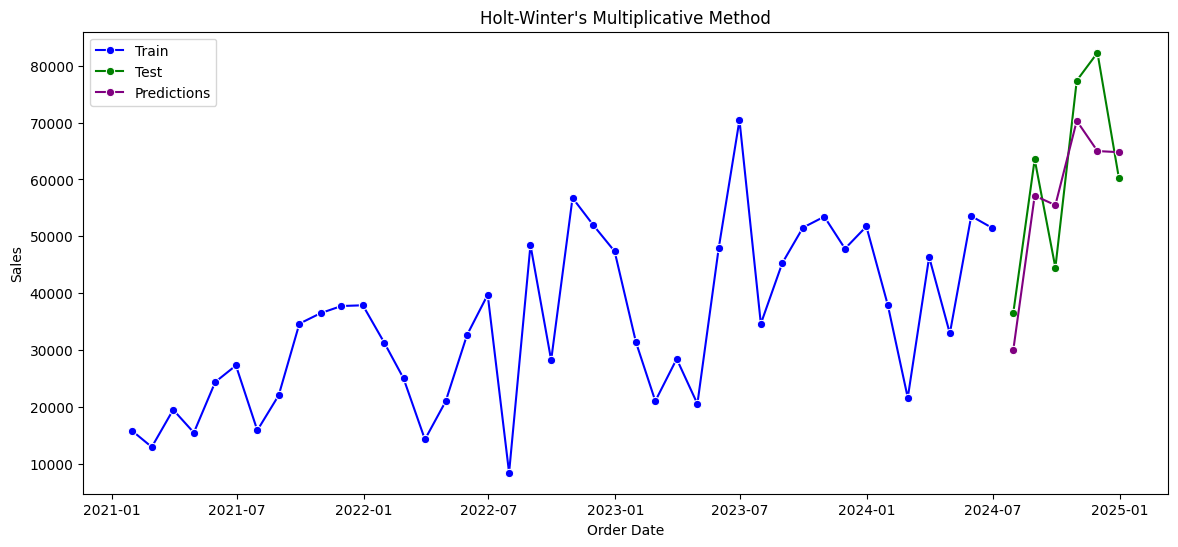

In [54]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Order Date', y = y_pred_hwm, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Holt-Winter\'s Multiplicative Method');

We will now compute RMSE and MAPE values for the model.

In [55]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_hwm_list = y_pred_hwm

rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = y_pred_hwm_list))
mape = np.mean(np.abs(df_test['Sales'] - y_pred_hwm_list) / df_test['Sales']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Holt Winter\'s Multiplicative', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,18076.71,25.40
Naive,18774.05,26.86
Simple Average,30846.00,38.18
Simple Moving Average,23204.52,27.93
Simple Exponential Smoothing,22319.00,27.61
Holt's,16861.22,24.74
Holt Winter's Additive,11552.81,15.35
Holt Winter's Multiplicative,9781.34,15.05


You can see that Holt-Winter's multiplicative model performs the best as compared to other models.